In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [22]:
dfTitanic = pd.read_csv(r"C:\Users\ML162\Desktop\Programas em Python\Jupyter_scripts\titanic\titanic.csv")
dfTitanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [23]:
dfTitanic.info()
#Fare -> tarifa
#Siblings/Spouses Abord -> Irmãos/Cônjuges a bordo
#Survided: 0 -> NO / 1 -> YES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


In [24]:
dfTitanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [25]:
dfTitanic1class = dfTitanic[dfTitanic['Pclass'] == 1]
dfTitanic2class = dfTitanic[dfTitanic['Pclass'] == 2]
dfTitanic3class = dfTitanic[dfTitanic['Pclass'] == 3]

In [26]:
#get number of rows
#means get number of passangers in each class
total1class = dfTitanic1class.shape[0]
total2class = dfTitanic2class.shape[0]
total3class = dfTitanic3class.shape[0]

In [27]:
(dfTitanic1class.Survived.sum()/total1class)*100

62.96296296296296

In [28]:
(dfTitanic2class.Survived.sum()/total2class)*100

47.28260869565217

In [29]:
(dfTitanic3class.Survived.sum()/total3class)*100

24.435318275154007

# Logistic Regression 

In [30]:
#predict the probability of surviving for 3rd class
dfTitanic.drop('Name', axis=1, inplace=True)
i=0
for item in dfTitanic['Sex']:
    if(np.asarray(dfTitanic['Sex'])[i] == 'male'):
        np.asarray(dfTitanic['Sex'])[i] = 1
    else:
        np.asarray(dfTitanic['Sex'])[i] = 0
    i = i+1
dfTitanic.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,27.0,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [31]:
#split x e y into trainnig ans testing sets
#train_test_split() must receive array parameters
x = dfTitanic.drop('Survived', axis=1) #independent variables
y = dfTitanic['Survived'] #dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [32]:
#Model development and prediction
logReg = LogisticRegression()

In [33]:
logReg.fit(x_train,y_train)

C:\Users\ML162\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = logReg.predict(x_test)

In [42]:
#Model evaluation using confusing matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[122,  20],
       [ 26,  54]], dtype=int64)

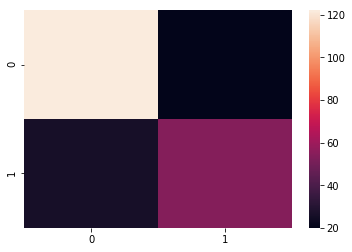

In [37]:
sns.heatmap(cnf_matrix)

In [39]:
accuracy_score(y_test, y_pred)

0.7927927927927928

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       142
           1       0.73      0.68      0.70        80

   micro avg       0.79      0.79      0.79       222
   macro avg       0.78      0.77      0.77       222
weighted avg       0.79      0.79      0.79       222

